# HackerEarth Machine Learning challenge: Adopt a buddy

## Problem statement
**Having a pet is one of life’s most fulfilling experiences. Your pets spoil you with their love, compassion and loyalty. And dare anyone lay a finger on you in your pet’s presence, they are in for a lot of trouble. Thanks to social media, videos of clumsy and fussy (yet adorable) pets from across the globe entertain you all day long. Their love is pure and infinite. So, in return, all pets deserve a warm and loving family, indeed. And occasional boops, of course.**

**Numerous organizations across the world provide shelter to all homeless animals until they are adopted into a new home. However, finding a loving family for them can be a daunting task at times.  This International Homeless Animals Day, we present a Machine Learning challenge to you: Adopt a buddy.**

**The brighter side of the pandemic is an increase in animal adoption and fostering. To ensure that their customers stay indoors, a leading pet adoption agency plans on creating a virtual-tour experience, showcasing all animals available in their shelter. To enable that, you have been tasked to build a Machine Learning model that determines type and breed of the animal based on its physical attributes and other factors.**

## Dataset
**The dataset consists of parameters such as: a unique ID assigned to each animal that is up for adoption, date on which they arrived at the shelter, their physical attributes such as color, length and height, among other factors.**

**The benefits of practicing this problem by using Machine Learning techniques are as follows:**

* This challenge will encourage you to apply your Machine Learning skills to build models that classify images into multiple categories
* This challenge will help you to actively enhance your knowledge of multi-label classification. It is one of the basic building blocks of Machine Learning

**We challenge you to build a predictive model that detects the type and breed of an animal based on its condition, appearance, and other factors.**

**For more info visit https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-pet-adoption/**

## Import Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import time
%matplotlib inline

## Load & Prepare Data

In [47]:
train_df = pd.read_csv("../input/adopt-a-buddy/train.csv")
test_df=pd.read_csv("../input/adopt-a-buddy/test.csv")


In [48]:
train_df.head()


,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [49]:
train_df.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [50]:
train_df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [51]:
train_df.pet_category.unique()

array([1, 2, 4, 0])

In [52]:

#train_df['pet_category'].replace(4,3,inplace=True)

In [53]:
train_df.color_type.unique()

array(['Brown Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor',
       'Calico', 'Brown Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn',
       'Buff', 'Torbie', 'Orange Tabby', 'Sable', 'Tan', 'Blue Tick',
       'Orange', 'Blue Tabby', 'Chocolate', 'Black Tabby',
       'Black Brindle', 'Cream Tabby', 'Gold', 'Calico Point',
       'Blue Merle', 'Red Merle', 'Yellow', 'Lynx Point', 'Blue Cream',
       'Flame Point', 'Cream', 'Yellow Brindle', 'Blue Tiger',
       'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke',
       'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot',
       'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver',
       'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick',
       'Pink', 'Black Tiger', 'Silver Lynx Point'], dtype=object)

In [54]:
train_df.pet_category.unique()

array([1, 2, 4, 0])

In [55]:
train_df.breed_category.unique()

array([0., 2., 1.])

In [56]:
train_df.breed_category=train_df.breed_category.astype(int)
# train_df.pet_category=train_df.pet_category.astype(str)
train_df.condition=train_df.condition.astype('Int64')


In [57]:
train_df.color_type = pd.Categorical(train_df.color_type)
train_df.color_type=train_df.color_type.cat.codes

In [58]:
test_df.color_type = pd.Categorical(test_df.color_type)
test_df.color_type=test_df.color_type.cat.codes

In [59]:
train_df.head()
#train_df.dtypes


,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2,18,0.80,7.78,13,9,0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1,53,0.72,14.19,13,9,0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,<NA>,15,0.15,40.90,15,4,2,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1,53,0.62,17.82,0,1,0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2,2,0.50,11.06,18,4,0,1


In [60]:
train_df.condition.unique()

<IntegerArray>
[2, 1, <NA>, 0]
Length: 4, dtype: Int64

In [61]:
##All NaN belongs to particular breed category
train_df[train_df['breed_category']==2].condition.isnull().sum()

1477

In [62]:
##All NaN belongs to particular breed category
train_df[train_df['breed_category']==2].condition.unique()

<IntegerArray>
[<NA>]
Length: 1, dtype: Int64

In [63]:
##Fill NaN values with 3 
train_df['condition'].fillna(3,inplace=True)
test_df['condition'].fillna(3,inplace=True)

In [64]:
train_df[train_df['breed_category']==2].condition.unique()

<IntegerArray>
[3]
Length: 1, dtype: Int64

In [65]:
train_df.breed_category=train_df.breed_category.astype(int)
# train_df.pet_category=train_df.pet_category.astype(str)
train_df.condition=train_df.condition.astype(int)
train_df.color_type=train_df.condition.astype(int)


In [66]:
test_df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,2,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,36,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,2,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,2,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,14,0.71,30.92,0,7


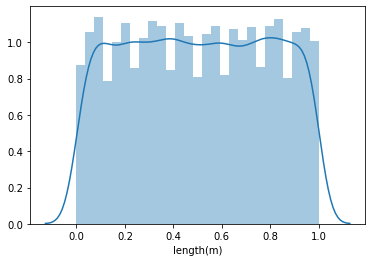

In [67]:
sns.distplot(train_df['length(m)'])

In [68]:
print(len(train_df[train_df['length(m)'] == 0]))
print(len(test_df[test_df['length(m)']==0]))

93
44


In [69]:
train_df['length(cm)'] = train_df['length(m)'].apply(lambda x: x*100)
test_df['length(cm)'] = test_df['length(m)'].apply(lambda x: x*100)

In [70]:
train_df.drop('length(m)', axis=1, inplace=True)
test_df.drop('length(m)', axis=1, inplace=True)

In [71]:
train_df[train_df['length(cm)']==0].groupby(['length(cm)','pet_category']).size()

length(cm)  pet_category
0.0         1               35
            2               56
            4                2
dtype: int64

In [72]:
test_df['length(cm)'].mean()

50.72646184340932

In [73]:
val = train_df['length(cm)'].mean()
train_df['length(cm)'] = train_df['length(cm)'].replace(to_replace=0, value=val)
test_df['length(cm)'] = test_df['length(cm)'].replace(to_replace=0, value=val)

In [74]:
train_df[['length(cm)','height(cm)']].describe()

,length(cm),height(cm)
count,18834.000000,18834.000000
mean,50.511761,27.448832
std,28.652550,13.019781
min,1.000000,5.000000
25%,26.000000,16.172500
50%,50.263566,27.340000
75%,76.000000,38.890000
max,100.000000,50.000000


In [75]:
train_df['ratio_len_height'] = train_df['length(cm)']/train_df['height(cm)']

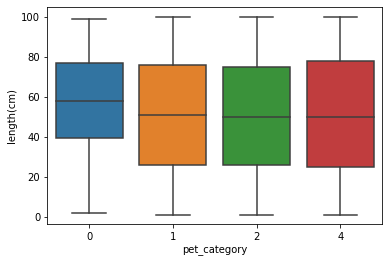

In [76]:
sns.boxplot(x='pet_category',y='length(cm)',data=train_df)

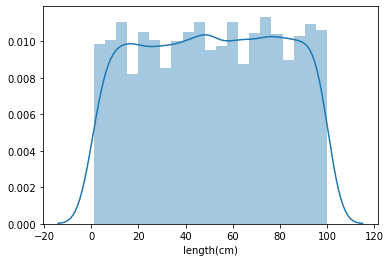

In [77]:
sns.distplot(test_df['length(cm)'])

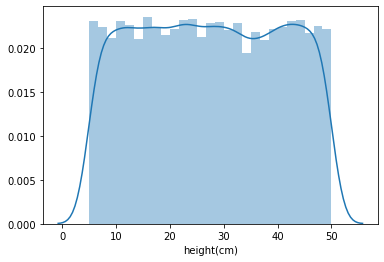

In [78]:
sns.distplot(train_df['height(cm)'])

In [79]:
print(train_df.groupby(['breed_category']).size())
print(train_df.groupby(['pet_category']).size())

breed_category
0    9000
1    8357
2    1477
dtype: int64
pet_category
0       88
1     7184
2    10621
4      941
dtype: int64


In [80]:
print(train_df.groupby(['breed_category','pet_category']).size())


breed_category  pet_category
0               0                 30
                1               3195
                2               5692
                4                 83
1               0                  7
                1               3406
                2               4869
                4                 75
2               0                 51
                1                583
                2                 60
                4                783
dtype: int64


## Correlation Plot

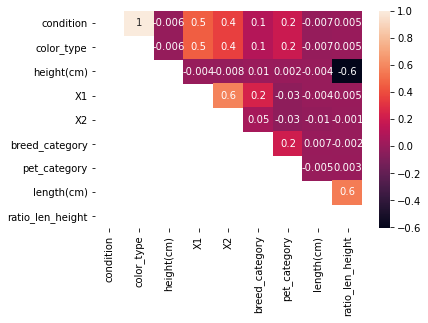

In [81]:
matrix=np.tril(train_df.corr())
sns.heatmap(train_df.corr(),annot=True,fmt='.1g' ,mask=matrix)

In [82]:
test_df

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,length(cm)
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,2,42.73,0,7,87.0
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,36,6.71,0,1,6.0
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,2,41.21,0,7,24.0
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,2,8.46,7,1,29.0
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,14,30.92,0,7,71.0
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,14,36.08,13,9,82.0
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,46,27.54,13,9,49.0
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,2,37.19,0,7,98.0
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,3.0,2,23.83,0,2,79.0


## Resample to deal with skewed data

In [83]:
# separate minority and majority classes
breedcat0 = train_df[train_df.breed_category==0]
breedcat1 = train_df[train_df.breed_category==1]
breedcat2= train_df[train_df.breed_category==2]

# upsample minority
pos_upsampled = resample(breedcat2,
 replace=True, # sample with replacement
 n_samples=len(breedcat1), # match number in majority class
 random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_breed = pd.concat([breedcat0,breedcat1, pos_upsampled])
upsampled_breed.breed_category.value_counts()

0    9000
2    8357
1    8357
Name: breed_category, dtype: int64

In [84]:
# separate minority and majority classes
petcat0 = upsampled_breed[upsampled_breed.pet_category==0]
petcat1 = upsampled_breed[upsampled_breed.pet_category==1]
petcat2 = upsampled_breed[upsampled_breed.pet_category==2]
petcat4 = upsampled_breed[upsampled_breed.pet_category==4]


# upsample minority
pos_upsampled_0 = resample(petcat0,
 replace=True, # sample with replacement
 n_samples=len(petcat1), # match number in majority class
 random_state=27) # reproducible results
pos_upsampled_4 = resample(petcat4,
 replace=True, # sample with replacement
 n_samples=len(petcat1), # match number in majority class
 random_state=27) # reproducible results

# combine majority and upsampled minority
train_upsampled = pd.concat([pos_upsampled_0,petcat1, petcat2, petcat4])
train_upsampled.pet_category.value_counts()

2    10915
1     9956
0     9956
4     4502
Name: pet_category, dtype: int64

In [85]:
train_upsampled

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height
12026,ANSL_52992,2015-03-22 00:00:00,2017-04-19 18:57:00,2,2,43.11,7,1,0,0,74.0,1.716539
3731,ANSL_62949,2017-10-03 00:00:00,2018-11-01 18:10:00,3,3,34.78,7,1,2,0,67.0,1.926394
3731,ANSL_62949,2017-10-03 00:00:00,2018-11-01 18:10:00,3,3,34.78,7,1,2,0,67.0,1.926394
6487,ANSL_59435,2016-03-23 00:00:00,2017-04-22 17:37:00,2,2,30.43,11,4,1,0,46.0,1.511666
13155,ANSL_56221,2016-12-01 00:00:00,2017-12-22 13:26:00,3,3,22.13,0,7,2,0,99.0,4.473565
...,...,...,...,...,...,...,...,...,...,...,...,...
3038,ANSL_68705,2017-08-28 00:00:00,2018-09-19 08:38:00,3,3,46.22,15,4,2,4,95.0,2.055387
12681,ANSL_51954,2017-08-07 00:00:00,2018-08-31 18:28:00,3,3,44.21,18,4,2,4,20.0,0.452386
16036,ANSL_75743,2018-03-23 00:00:00,2019-04-13 08:54:00,3,3,15.50,15,4,2,4,17.0,1.096774
16448,ANSL_75370,2017-03-20 00:00:00,2019-04-07 18:30:00,3,3,5.86,15,4,2,4,99.0,16.894198


## Data Preprosessing for Keras

In [86]:
categorical_columns_test = ['condition', 'color_type', 'X1', 'X2']
categorical_columns = ['condition', 'color_type', 'X1', 'X2','breed_category']
numerical_columns = ['height(cm)','length(cm)']
output1 = ['breed_category']
output2=['pet_category']

In [87]:
#train_cat_df_1=pd.DataFrame(columns=categorical_columns1)
for category in categorical_columns:
    train_upsampled[category] = train_upsampled[category].astype('category')
    train_upsampled[category]=train_upsampled[category].cat.codes

In [88]:
#test_cat_df_1=pd.DataFrame(columns=categorical_columns1)
for category in categorical_columns_test:
    test_df[category] = test_df[category].astype('category')
    test_df[category]=test_df[category].cat.codes

In [89]:
train_upsampled.dtypes

pet_id               object
issue_date           object
listing_date         object
condition              int8
color_type             int8
height(cm)          float64
X1                     int8
X2                     int8
breed_category         int8
pet_category          int64
length(cm)          float64
ratio_len_height    float64
dtype: object

In [90]:
X_train=train_upsampled.iloc[:,[3,4,5,6,7,10]]
X_train_pet=train_upsampled.iloc[:,[3,4,5,6,7,8,10]]
X_test=test_df.iloc[:,[3,4,5,6,7,8]]
#y_train=train_upsampled.iloc[:,[8,9]]
y_train_breed=train_upsampled["breed_category"]
y_train_pet=train_upsampled["pet_category"]


In [91]:
y_train_pet

12026    0
3731     0
3731     0
6487     0
13155    0
        ..
3038     4
12681    4
16036    4
16448    4
8131     4
Name: pet_category, Length: 35329, dtype: int64

In [92]:
y_train_pet=y_train_pet.replace(4,3)


In [93]:
y_train_pet

12026    0
3731     0
3731     0
6487     0
13155    0
        ..
3038     3
12681    3
16036    3
16448    3
8131     3
Name: pet_category, Length: 35329, dtype: int64

In [94]:
X_train.dtypes

condition        int8
color_type       int8
height(cm)    float64
X1               int8
X2               int8
length(cm)    float64
dtype: object

In [95]:
y_train_breed_enc=to_categorical(y_train_breed)
y_train_breed_enc.shape

(35329, 3)

In [96]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

## Create Model for predicting Breed Category

In [97]:
# define the model
#get number of columns in training data
n_cols=X_train_scaled.shape[1]
n_out=y_train_breed_enc.shape[1]
# define model 2 layers
model_breed = Sequential()
model_breed.add(Dense(100, input_dim=n_cols, activation='relu'))
model_breed.add(Dense(50, activation='relu'))

model_breed.add(Dense(n_out, activation='softmax'))
# compile model
model_breed.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
epochs= 10
start=time.time()
#fit model
hist=model_breed.fit(X_train_scaled, y_train_breed_enc,  validation_split=0.1, epochs=epochs,batch_size=100, verbose=1)
end=time.time()
print("Elapsed Time: ", end-start)

Epoch 1/10
318/318 [==============================] - 1s 2ms/step - loss: 0.3061 - accuracy: 0.8722 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/10
318/318 [==============================] - 1s 2ms/step - loss: 0.1197 - accuracy: 0.9300 - val_loss: 2.9090e-04 - val_accuracy: 1.0000
Epoch 3/10
318/318 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9318 - val_loss: 1.1747e-04 - val_accuracy: 1.0000
Epoch 4/10
318/318 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9332 - val_loss: 4.7892e-05 - val_accuracy: 1.0000
Epoch 5/10
318/318 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9325 - val_loss: 3.8308e-05 - val_accuracy: 1.0000
Epoch 6/10
318/318 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9332 - val_loss: 2.6084e-05 - val_accuracy: 1.0000
Epoch 7/10
318/318 [==============================] - 1s 2ms/step - loss: 0.1095 - accuracy: 0.9321 - val_loss: 2.1115e-05 - val

## Predict Breed Category

In [99]:
# predict probabilities for test set
yhat_probs = model_breed.predict(X_test_scaled, verbose=0)
# predict crisp classes for test set
yhat_classes = model_breed.predict_classes(X_test_scaled, verbose=1)

253/253 [==============================] - 0s 768us/step


In [100]:
#yhat=pd.DataFrame(yhat_classes,name='pet_category')
#X_test_breed=pd.concat([X_test,yhat])
#X_test_breed
X_test['breed_category']=yhat_classes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [101]:

X_test['breed_category']=X_test['breed_category'].astype('category')
X_test['breed_category']=X_test['breed_category'].cat.codes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
X_test

,condition,color_type,height(cm),X1,X2,length(cm),breed_category
0,0,2,42.73,0,7,87.0,0
1,1,36,6.71,0,1,6.0,1
2,1,2,41.21,0,7,24.0,0
3,1,2,8.46,6,1,29.0,0
4,1,14,30.92,0,7,71.0,0
...,...,...,...,...,...,...,...
8067,2,14,36.08,12,9,82.0,1
8068,0,46,27.54,12,9,49.0,0
8069,0,2,37.19,0,7,98.0,0
8070,3,2,23.83,0,2,79.0,2


## Create Model for predicting Pet Category from previous output

In [103]:
y_train_pet_enc=to_categorical(y_train_pet)
y_train_pet_enc
#raname 4 to 3

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [104]:
sc = StandardScaler()
X_train_scaled_pet = sc.fit_transform(X_train_pet)
X_test_scaled_pet = sc.fit_transform(X_test)
X_train_scaled_pet

array([[ 0.06042812,  0.06042812,  1.26263613, ..., -1.09793061,
        -1.41271608,  0.76412301],
       [ 0.91266969,  0.91266969,  0.5929672 , ..., -1.09793061,
         0.94647403,  0.51863079],
       [ 0.91266969,  0.91266969,  0.5929672 , ..., -1.09793061,
         0.94647403,  0.51863079],
       ...,
       [ 0.91266969,  0.91266969, -0.95699883, ..., -0.16876876,
         0.94647403, -1.23488507],
       [ 0.91266969,  0.91266969, -1.73198185, ..., -0.16876876,
         0.94647403,  1.64088094],
       [ 0.91266969,  0.91266969, -1.5848637 , ..., -0.47848938,
         0.94647403, -0.18277555]])

In [105]:
X_train_scaled_pet.shape

(35329, 7)

In [115]:
# define the model
#get number of columns in training data
n_cols=X_train_scaled_pet.shape[1]
n_out=y_train_pet_enc.shape[1]
# define model 2 layers
model_pet = Sequential()
model_pet.add(Dense(32, input_dim=n_cols, activation='relu'))
model_pet.add(Dense(16, activation='relu'))
model_pet.add(Dense(8, activation='relu'))

model_pet.add(Dense(n_out, activation='softmax'))
# compile model
model_pet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
epochs= 100
start=time.time()
#fit model
hist=model_pet.fit(X_train_scaled_pet, y_train_pet_enc,  validation_split=0.1, epochs=epochs,batch_size=200, verbose=1)
end=time.time()
print("Elapsed Time: ", end-start)

Epoch 1/100
159/159 [==============================] - 0s 3ms/step - loss: 1.0410 - accuracy: 0.5924 - val_loss: 2.4517 - val_accuracy: 0.0000e+00
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.7165 - val_loss: 2.5509 - val_accuracy: 0.0000e+00
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7313 - val_loss: 2.4946 - val_accuracy: 0.0000e+00
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7379 - val_loss: 2.4961 - val_accuracy: 0.0000e+00
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.7417 - val_loss: 2.3711 - val_accuracy: 0.0000e+00
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.7453 - val_loss: 2.3725 - val_accuracy: 0.0000e+00
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7453 - val_loss: 2.251

159/159 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8038 - val_loss: 0.8145 - val_accuracy: 0.7368
Epoch 58/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8046 - val_loss: 0.8972 - val_accuracy: 0.7274
Epoch 59/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8047 - val_loss: 0.8437 - val_accuracy: 0.7413
Epoch 60/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8053 - val_loss: 0.7710 - val_accuracy: 0.7427
Epoch 61/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8044 - val_loss: 0.8253 - val_accuracy: 0.7390
Epoch 62/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8062 - val_loss: 0.7892 - val_accuracy: 0.7433
Epoch 63/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8054 - val_loss: 0.8156 - val_accuracy: 0.7433
Epoch

In [117]:
# predict probabilities for test set
yhat_probs_final = model_pet.predict(X_test_scaled_pet, verbose=0)
# predict crisp classes for test set
yhat_classes_final = model_pet.predict_classes(X_test_scaled_pet, verbose=1)

253/253 [==============================] - 0s 813us/step


In [118]:
X_test['pet_category']=yhat_classes_final

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
X_test

,condition,color_type,height(cm),X1,X2,length(cm),breed_category,pet_category
0,0,2,42.73,0,7,87.0,0,2
1,1,36,6.71,0,1,6.0,1,0
2,1,2,41.21,0,7,24.0,0,2
3,1,2,8.46,6,1,29.0,0,1
4,1,14,30.92,0,7,71.0,0,2
...,...,...,...,...,...,...,...,...
8067,2,14,36.08,12,9,82.0,1,1
8068,0,46,27.54,12,9,49.0,0,1
8069,0,2,37.19,0,7,98.0,0,2
8070,3,2,23.83,0,2,79.0,2,0


In [131]:
new_data=pd.merge(df_pred.pet_id,X_test[['breed_category','pet_category']], how = 'left', left_index = True, right_index = True)

In [133]:
new_data.to_csv('predictions_nn.csv')

## Create Prediction File

In [110]:
df_pred=pd.DataFrame(test_df.pet_id)

In [111]:
df_pred.head()

,pet_id
0,ANSL_75005
1,ANSL_76663
2,ANSL_58259
3,ANSL_67171
4,ANSL_72871


In [112]:
X_test

,condition,color_type,height(cm),X1,X2,length(cm),breed_category,pet_category
0,0,2,42.73,0,7,87.0,0,2
1,1,36,6.71,0,1,6.0,1,0
2,1,2,41.21,0,7,24.0,0,2
3,1,2,8.46,6,1,29.0,0,1
4,1,14,30.92,0,7,71.0,0,2
...,...,...,...,...,...,...,...,...
8067,2,14,36.08,12,9,82.0,1,1
8068,0,46,27.54,12,9,49.0,0,1
8069,0,2,37.19,0,7,98.0,0,2
8070,3,2,23.83,0,2,79.0,2,1


In [113]:
test_df

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,length(cm)
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0,2,42.73,0,7,87.0
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1,36,6.71,0,1,6.0
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1,2,41.21,0,7,24.0
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1,2,8.46,6,1,29.0
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1,14,30.92,0,7,71.0
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2,14,36.08,12,9,82.0
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0,46,27.54,12,9,49.0
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0,2,37.19,0,7,98.0
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,3,2,23.83,0,2,79.0


In [114]:
pd.DataFrame(y_hat, index=df_pred.pet_id, columns=['breed_category','pet_category'], dtype=None, copy=False).to_csv('predictions4.csv')

NameError: name 'y_hat' is not defined